In [5]:

import numpy as np

limit = 100

_step_lambda_0    = np.loadtxt("/h1/bhoon/20221229_pix2pix_lambda/lambda_0_fid.txt")[:limit]
_step_lambda_0_1  = np.loadtxt("/h1/bhoon/20221229_pix2pix_lambda/lambda_0.1_fid.txt")[:limit]
_step_lambda_1    = np.loadtxt("/h1/bhoon/20221229_pix2pix_lambda/lambda_1_fid.txt")[:limit]
_step_lambda_10   = np.loadtxt("/h1/bhoon/20221229_pix2pix_lambda/lambda_10_fid.txt")[:limit]
_step_lambda_100  = np.loadtxt("/h1/bhoon/20221229_pix2pix_lambda/lambda_100_fid.txt")[:limit]
_step_lambda_1000 = np.loadtxt("/h1/bhoon/20221229_pix2pix_lambda/lambda_1000_fid.txt")[:limit]
_step_l1    = np.loadtxt("/h1/bhoon/20221229_pix2pix_lambda/l1_fid.txt")[:limit]

step_lambda_0    = np.argmin(_step_lambda_0 )*50+50
step_lambda_0_1  = np.argmin(_step_lambda_0_1)*50+50
step_lambda_1    = np.argmin(_step_lambda_1)*50+50
step_lambda_10   = np.argmin(_step_lambda_10)*50+50
step_lambda_100  = np.argmin(_step_lambda_100 )*50+50
step_lambda_1000 = np.argmin(_step_lambda_1000)*50+50

step_l1    = np.argmin(_step_l1)*50+50


step_lambda_0, step_lambda_0_1, step_lambda_1, step_lambda_10, step_lambda_100, step_lambda_1000, step_l1

(4700, 4900, 4200, 2250, 3100, 4750, 4450)

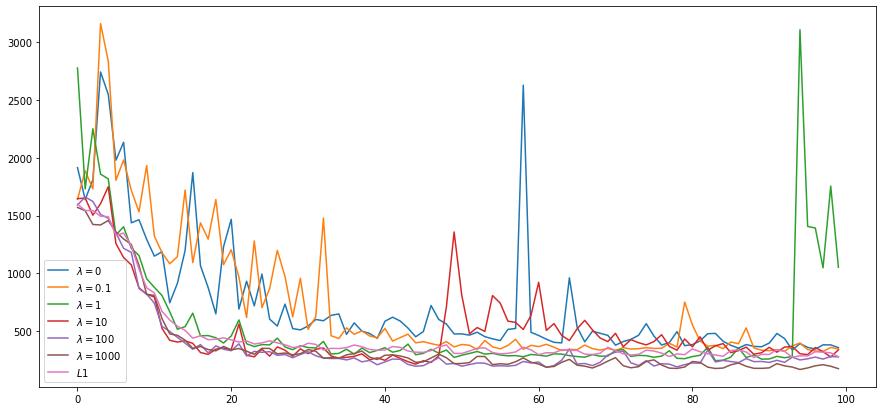

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(_step_lambda_0,label='$\lambda = 0$')
plt.plot(_step_lambda_0_1,label='$\lambda = 0.1$')
plt.plot(_step_lambda_1,label='$\lambda = 1$')
plt.plot(_step_lambda_10,label='$\lambda = 10$')
plt.plot(_step_lambda_100,label='$\lambda = 100$')
plt.plot(_step_lambda_1000,label='$\lambda = 1000$')
plt.plot(_step_l1,label='$L1$')
plt.legend()
plt.show()

In [10]:
import tensorflow as tf

model_lambda_0    = tf.keras.models.load_model("/h1/bhoon/20221229_pix2pix_lambda/model/lambda_0/G_{}.h5".format(str(step_lambda_0).zfill(5)))
model_lambda_0_1  = tf.keras.models.load_model("/h1/bhoon/20221229_pix2pix_lambda/model/lambda_0.1/G_{}.h5".format(str(step_lambda_0_1).zfill(5)))
model_lambda_1    = tf.keras.models.load_model("/h1/bhoon/20221229_pix2pix_lambda/model/lambda_1/G_{}.h5".format(str(step_lambda_1).zfill(5)))
model_lambda_10   = tf.keras.models.load_model("/h1/bhoon/20221229_pix2pix_lambda/model/lambda_10/G_{}.h5".format(str(step_lambda_10).zfill(5)))
model_lambda_100  = tf.keras.models.load_model("/h1/bhoon/20221229_pix2pix_lambda/model/lambda_100/G_{}.h5".format(str(step_lambda_100).zfill(5)))
model_lambda_1000 = tf.keras.models.load_model("/h1/bhoon/20221229_pix2pix_lambda/model/lambda_1000/G_{}.h5".format(str(step_lambda_1000).zfill(5)))
model_l1 = tf.keras.models.load_model("/h1/bhoon/20221229_pix2pix_lambda/model/l1/G_{}.h5".format(str(step_l1).zfill(5)))

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob
os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [12]:
def show_grid(data,r=4,c=4,jump=1,title='',save='',cmap='gray'):
    plt.figure(figsize=(c*2+1,r*2+1))
    i = 1
    for j in range(0,len(data),jump):
        dat = data[j]
        plt.subplot(r, c, i) 
        plt.imshow(dat, cmap=cmap)
        plt.axis('off')
        i+=1
        if i > r*c: break
    if title:
        plt.suptitle(title)
    if save:
        plt.savefig(save, bbox_inches='tight', pad_inches=0)
        plt.close()
    plt.show()
    
def from_bin(fname,nx,nz):
    fopen=open(fname,'rb')
    data=np.fromfile(fopen,dtype=np.float32)
    data=data.reshape(nx,nz)
    return data

def bin_to_refl_patch(clist_path, ndata=200):
    result=[]
    for cp in clist_path:
        for di in range(1,ndata+1):
            c = cp+'/model.bin.{}'.format(str(di).zfill(5))
            dat = from_bin(c,1024,256)[::8].transpose()
            result.append(dat[:128])
            result.append(dat[128:])
    return np.array(result)

# def bin_to_refl_patch(clist_path, ndata=200):
#     result=[]
#     for cp in clist_path:
#         for di in range(1,ndata+1):
#             c = cp+'/model.bin.{}'.format(str(di).zfill(5))
#             dummy = np.zeros((376,128))
#             dat = from_bin(c,1001,376)[::8].transpose()
#             dummy[:,:126] = dat
#             dummy[:,-2] = dat[:,-1]
#             dummy[:,-1] = dat[:,-1]
#             dat = dummy
#             result.append(dat[:128])
#             result.append(dat[128:256])
#             result.append(dat[-128:])
#     return np.array(result)

# def patch2_sub_sample_from_bin_flist(flist):
#     result = []
#     for i in range(len(flist)):
#         dat = from_bin(flist[i],1024,256)[::8].transpose()
#         result.append(dat[:128])
#         result.append(dat[128:])
#     return np.array(result)

def asc_to_edge_patch(clist_path, ndata=200, xs=4000,ys=1500,xr=128,yr=256):
    result=[]
    for cp in clist_path:
        for di in range(1,ndata+1):
            clist = sorted(glob.glob(cp+'/label.asc.{}.*'.format(str(di).zfill(5))))
            _edge = np.zeros((yr,xr))
            
            for cf in clist:
                coor = np.loadtxt(cf).astype(float)
                coor[:,0], coor[:,1]  = (coor[:,0]/ys*yr).astype(int), (coor[:,1]/xs*xr).astype(int)
                coor = coor.astype(int)
                for c in coor:
                    try:
                        _edge[c[0]-1:c[0]+1,c[1]-1:c[1]+1] = 1
                    except:
                        pass
            result.append(_edge[:128])
            result.append(_edge[128:])
    return np.array(result)

# def asc_to_edge_patch(clist_path, ndata=200, xs=4000,ys=1500,xr=128,yr=376):
#     result=[]
#     for cp in clist_path:
#         for di in range(1,ndata+1):
#             clist = sorted(glob.glob(cp+'/label.asc.{}.*'.format(str(di).zfill(5))))
#             _edge = np.zeros((yr,xr))
            
#             for cf in clist:
#                 coor = np.loadtxt(cf).astype(float)
#                 coor[:,0], coor[:,1]  = (coor[:,0]/ys*yr).astype(int), (coor[:,1]/xs*xr).astype(int)
#                 coor = coor.astype(int)
#                 for c in coor:
#                     try:
#                         _edge[c[0]-1:c[0]+1,c[1]-1:c[1]+1] = 1
#                     except:
#                         pass
#             result.append(_edge[:128])
#             result.append(_edge[128:256])
#             result.append(_edge[-128:])
#     return np.array(result)

In [13]:
mlist_path = sorted(glob.glob("/s1/bhoon/20220705_fault/out_model*"))
mlist_path

['/s1/bhoon/20220705_fault/out_model1', '/s1/bhoon/20220705_fault/out_model2']

In [14]:
clist_path = sorted(glob.glob("/s1/bhoon/20220705_fault/out_label*"))
clist_path

['/s1/bhoon/20220705_fault/out_label1', '/s1/bhoon/20220705_fault/out_label2']

In [15]:
refl_patch = bin_to_refl_patch(mlist_path,ndata=600)
refl_patch.shape

(2400, 128, 128)

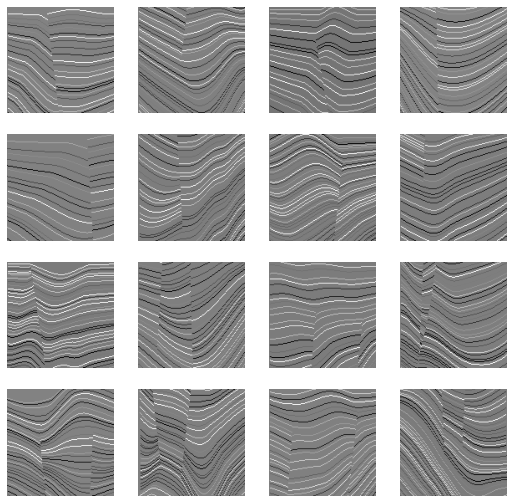

In [16]:
show_grid(refl_patch[::135])

In [17]:
edge_patch = asc_to_edge_patch(clist_path,ndata=600)

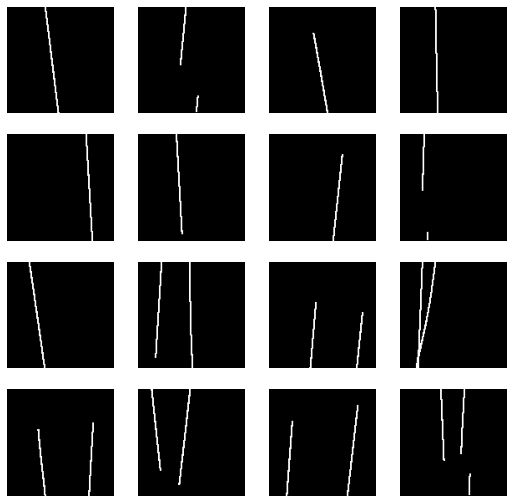

In [18]:
show_grid(edge_patch[::135])

In [19]:
refl_patch.shape, edge_patch.shape

((2400, 128, 128), (2400, 128, 128))

positive peaks are 1


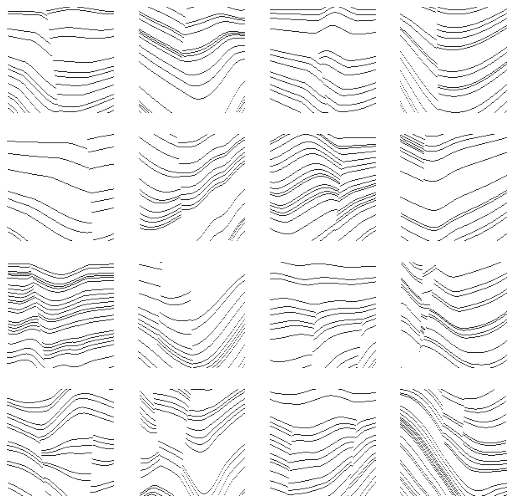

In [20]:
refl_patch_IN    = np.where(refl_patch>0,1,0)

print("positive peaks are 1")
show_grid(refl_patch_IN[::135],cmap='Greys')


In [22]:

refl_patch_OUT_lambda_0    = model_lambda_0.predict(refl_patch_IN,batch_size=128)
refl_patch_OUT_lambda_0_1  = model_lambda_0_1.predict(refl_patch_IN,batch_size=128)
refl_patch_OUT_lambda_1    = model_lambda_1.predict(refl_patch_IN,batch_size=128)
refl_patch_OUT_lambda_10   = model_lambda_10.predict(refl_patch_IN,batch_size=128)
refl_patch_OUT_lambda_100  = model_lambda_100.predict(refl_patch_IN,batch_size=128)
refl_patch_OUT_lambda_1000 = model_lambda_1000.predict(refl_patch_IN,batch_size=128)
refl_patch_OUT_l1    = model_l1.predict(refl_patch_IN,batch_size=128)


Lambda is 0


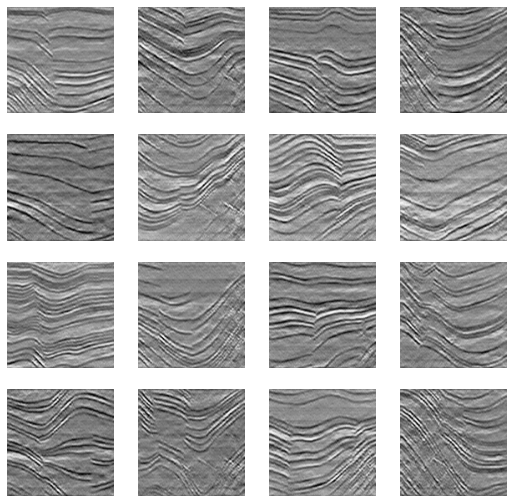

Lambda is 0.1


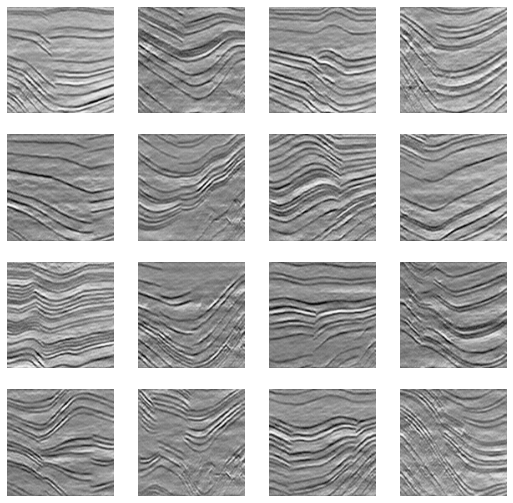

Lambda is 1


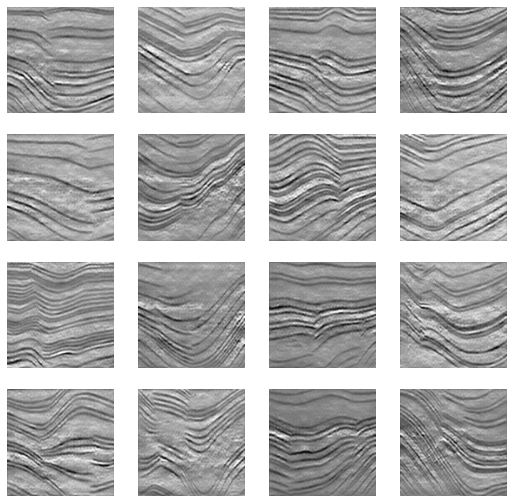

Lambda is 10


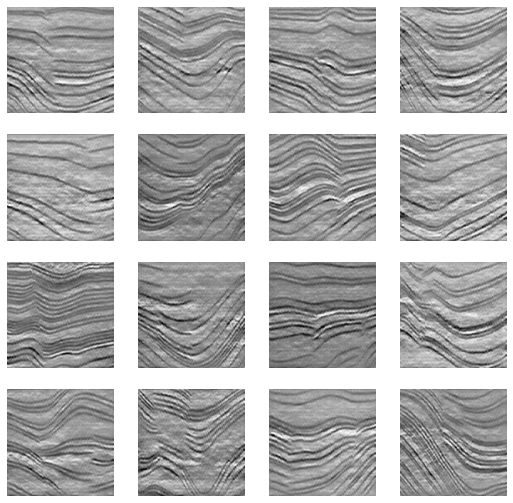

Lambda is 100


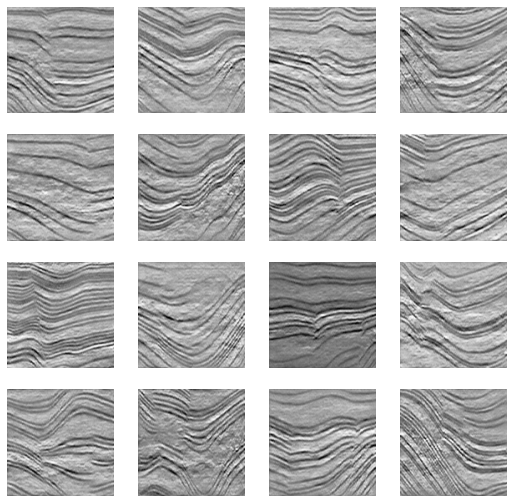

Lambda is 1000


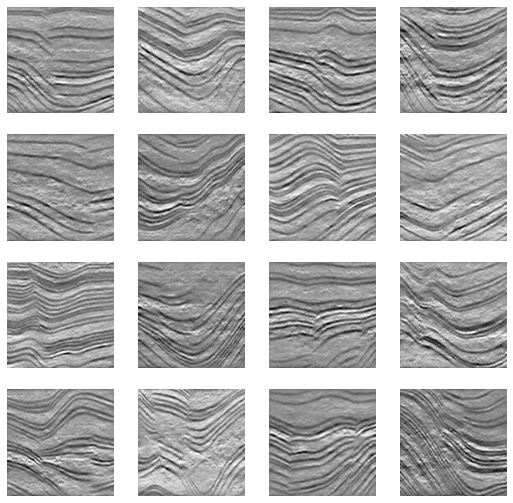

L1


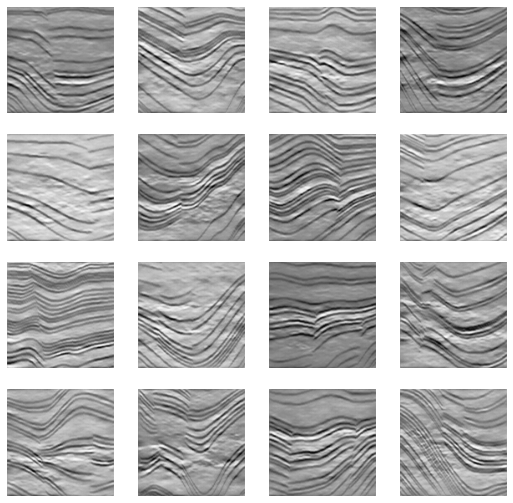

In [23]:
print("Lambda is 0")
show_grid(refl_patch_OUT_lambda_0[::135],cmap='Greys')

print("Lambda is 0.1")
show_grid(refl_patch_OUT_lambda_0_1[::135],cmap='Greys')

print("Lambda is 1")
show_grid(refl_patch_OUT_lambda_1[::135],cmap='Greys')

print("Lambda is 10")
show_grid(refl_patch_OUT_lambda_10[::135],cmap='Greys')

print("Lambda is 100")
show_grid(refl_patch_OUT_lambda_100[::135],cmap='Greys')

print("Lambda is 1000")
show_grid(refl_patch_OUT_lambda_1000[::135],cmap='Greys')

print("L1")
show_grid(refl_patch_OUT_l1[::135],cmap='Greys')


In [24]:
fault_idx = [500,1000,1500,2000]

In [25]:
# def standard_scaler(data):
#     scaled = []
#     for d in data:
#         scaled.append((d - np.mean(d))/np.std(d))
#     return np.array(scaled)

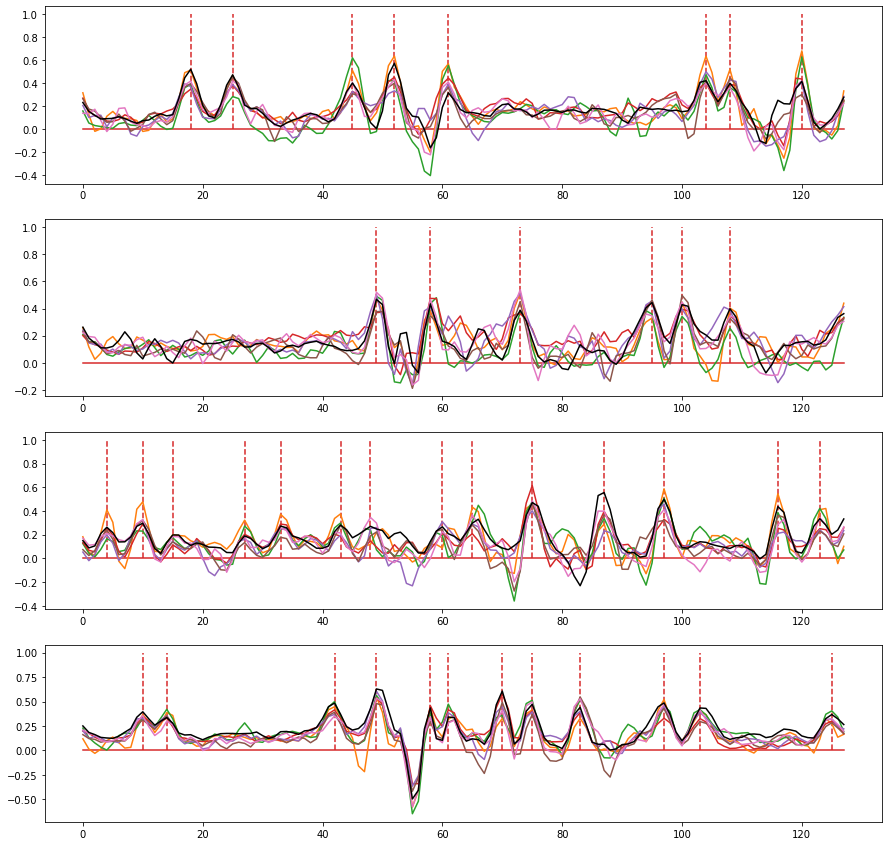

In [27]:

RI = refl_patch_IN
RO = refl_patch_OUT_lambda_0

 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):

    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(refl_patch_OUT_lambda_0[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(refl_patch_OUT_lambda_0_1[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(refl_patch_OUT_lambda_1[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(refl_patch_OUT_lambda_10[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(refl_patch_OUT_lambda_100[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(refl_patch_OUT_lambda_1000[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(refl_patch_OUT_l1[fault_idx])[i][:,64],c='k')

    
plt.show()

In [28]:
def standard_scaler(data):
    scaled = []
    for d in data:
        scaled.append((d - np.mean(d))/np.std(d))
    return np.array(scaled)

In [31]:
scaled_refl_patch_OUT_lambda_0    = standard_scaler(refl_patch_OUT_lambda_0)
scaled_refl_patch_OUT_lambda_0_1  = standard_scaler(refl_patch_OUT_lambda_0_1)
scaled_refl_patch_OUT_lambda_1    = standard_scaler(refl_patch_OUT_lambda_1)
scaled_refl_patch_OUT_lambda_10   = standard_scaler(refl_patch_OUT_lambda_10)
scaled_refl_patch_OUT_lambda_100  = standard_scaler(refl_patch_OUT_lambda_100)
scaled_refl_patch_OUT_lambda_1000 = standard_scaler(refl_patch_OUT_lambda_1000)
scaled_refl_patch_OUT_l1 = standard_scaler(refl_patch_OUT_l1)


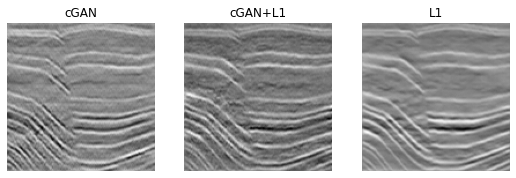

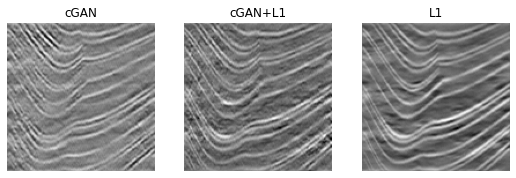

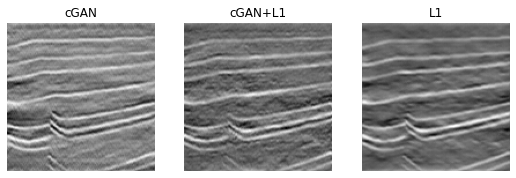

In [34]:

for idx in range(3):
    fig, ax = plt.subplots(1,3,figsize=(9,3))
    ax[0].imshow(refl_patch_OUT_lambda_0[idx],cmap='gray')
    ax[0].axis("off")
    ax[0].set_title("cGAN")
    ax[1].imshow(refl_patch_OUT_lambda_100[idx],cmap='gray')
    ax[1].axis("off")
    ax[1].set_title("cGAN+L1")
    ax[2].imshow(refl_patch_OUT_l1[idx],cmap='gray')
    ax[2].axis("off")
    ax[2].set_title("L1")
    plt.show()

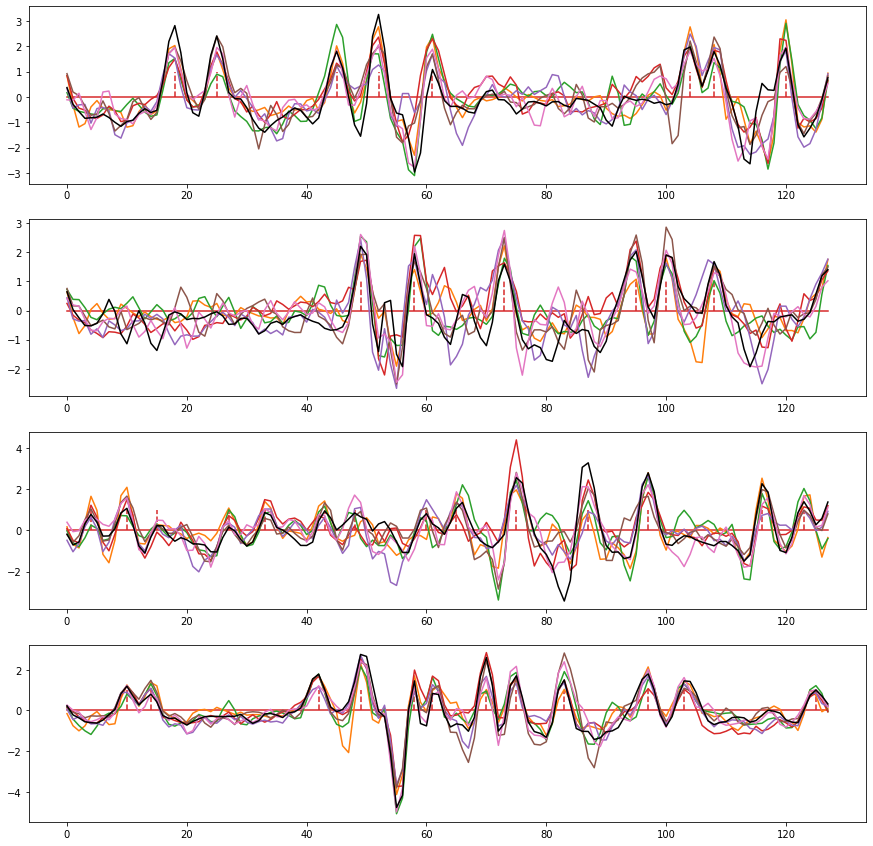

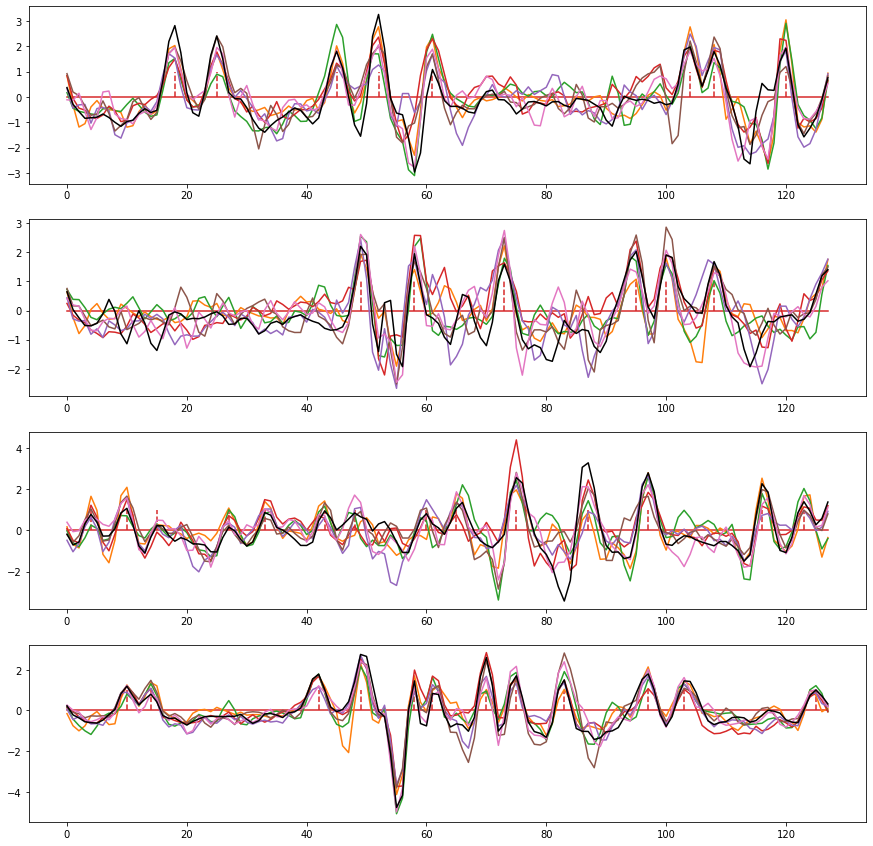

In [30]:
RI = refl_patch_IN
RO = refl_patch_OUT_lambda_0
 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_0[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_0_1[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_1[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_10[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_100[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_1000[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_l1[fault_idx])[i][:,64],c='k')
    # ax[i].plot(np.squeeze(scaled_refl_patch_OUT_l2[fault_idx])[i][:,64],c='b')
    
    
plt.show()

 
fig,ax = plt.subplots(len(fault_idx),1,figsize=(15,15))

for i in range(len(RO[fault_idx])):
    # plt.stem(np.squeeze(refl_patch_IN[fault_idx])[0][:,64],markerfmt=' ',linefmt='C2')
    ax[i].stem(np.squeeze(RI[fault_idx])[i][:,64],markerfmt=' ',linefmt='C3--')
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_0[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_0_1[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_1[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_10[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_100[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_lambda_1000[fault_idx])[i][:,64])
    ax[i].plot(np.squeeze(scaled_refl_patch_OUT_l1[fault_idx])[i][:,64],c='k')
    # ax[i].plot(np.squeeze(scaled_refl_patch_OUT_l2[fault_idx])[i][:,64],c='b')
    
    
    
plt.show()

In [28]:
np.save("/h1/bhoon/20221229_pix2pix_lambda/scaled_refl_patch_OUT_l1.npy",scaled_refl_patch_OUT_l1)

In [40]:
np.save("/h1/bhoon/20221229_pix2pix_lambda/scaled_refl_patch_OUT_lambda_0.npy",scaled_refl_patch_OUT_lambda_0)
np.save("/h1/bhoon/20221229_pix2pix_lambda/scaled_refl_patch_OUT_lambda_0.1.npy",scaled_refl_patch_OUT_lambda_0_1)
np.save("/h1/bhoon/20221229_pix2pix_lambda/scaled_refl_patch_OUT_lambda_1.npy",scaled_refl_patch_OUT_lambda_1)
np.save("/h1/bhoon/20221229_pix2pix_lambda/scaled_refl_patch_OUT_lambda_10.npy",scaled_refl_patch_OUT_lambda_10)
np.save("/h1/bhoon/20221229_pix2pix_lambda/scaled_refl_patch_OUT_lambda_100.npy",scaled_refl_patch_OUT_lambda_100)
np.save("/h1/bhoon/20221229_pix2pix_lambda/scaled_refl_patch_OUT_lambda_1000.npy",scaled_refl_patch_OUT_lambda_1000)

In [41]:
np.save("/h1/bhoon/20221229_pix2pix_lambda/FD_Y.npy",edge_patch)